In [242]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Importing and Merging the Two DataFrames

In [243]:
#Importing the two data frames 
Clinical_Trial = pd.read_csv ("C:/Users/Sisay/Desktop/Resources/clinicaltrial_data.csv")
Mouse_Drug = pd.read_csv ("C:/Users/Sisay/Desktop/Resources/mouse_drug_data.csv")

In [244]:
Clinical_Trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [245]:
Mouse_Drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [246]:
Clinical_Trial.shape

(1893, 4)

In [247]:
Mouse_Drug.shape


(250, 2)

In [248]:
# Merging the two dataframe  (inner join)
Merged_Data = pd.merge(Clinical_Trial, Mouse_Drug, on="Mouse ID", how="inner")
Merged_Data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


### Describing the dataframe and data wrangling

In [249]:
#Descriptive statstics the new dataframe 
Merged_Data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [250]:
Merged_Data.describe(include=['object'])

,Mouse ID,Drug
count,1906,1906
unique,249,10
top,g989,Capomulin
freq,26,230


In [251]:
Merged_Data.describe(include='all')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
count,1906,1906.000000,1906.000000,1906.000000,1906
unique,249,NaN,NaN,NaN,10
top,g989,NaN,NaN,NaN,Capomulin
freq,26,NaN,NaN,NaN,230
mean,NaN,19.538300,50.468120,1.018363,NaN
std,NaN,14.064786,8.869571,1.135991,NaN
min,NaN,0.000000,22.050126,0.000000,NaN
25%,NaN,5.000000,45.000000,0.000000,NaN
50%,NaN,20.000000,48.991921,1.000000,NaN
75%,NaN,30.000000,56.288484,2.000000,NaN


In [252]:
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


#### Preapring dataframe to create a scatter plot that shows tumor volume changes over time for each treatment


In [253]:
Drug_Time_Treat = Merged_Data.groupby(["Drug", "Timepoint"]).mean().round(2)
Drug_Time_Treat.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                       45.00              0.00
          5                       44.27              0.16
          10                      43.08              0.32
          15                      42.06              0.38
          20                      40.72              0.65

In [254]:
# Setting the x axis from 0 to 45 in increments of 5
timepoints = np.arange(0, 50, 5)

In [255]:
Drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane", "Placebo", "Zoniferol"]
Drug_list

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Placebo', 'Zoniferol']

In [256]:
#Tumor avarge by drug and timepoint
TumAvarage = Drug_Time_Treat["Tumor Volume (mm3)"]
TumAvarage

Drug       Timepoint
Capomulin  0            45.00
           5            44.27
           10           43.08
           15           42.06
           20           40.72
           25           39.94
           30           38.77
           35           37.82
           40           36.96
           45           36.24
Ceftamin   0            45.00
           5            46.50
           10           48.29
           15           50.09
           20           52.16
           25           54.29
           30           56.77
           35           58.83
           40           61.47
           45           64.13
Infubinol  0            45.00
           5            47.06
           10           49.40
           15           51.30
           20           53.20
           25           55.72
           30           58.30
           35           60.74
           40           63.16
           45           65.76
                        ...  
Ramicane   0            45.00
           5       

In [257]:
#Tumor volume by drug types 
Cap_tumor_vol_avg = TumAvarage.loc["Capomulin", :]
Cef_tumor_vol_avg = TumAvarage.loc["Ceftamin", :]
Inf_tumor_vol_avg = TumAvarage.loc["Infubinol", :]
Ram_tumor_vol_avg = TumAvarage.loc["Ramicane", :]
Ste_tumor_vol_avg = TumAvarage.loc["Stelasyn", :]
Zon_tumor_vol_avg = TumAvarage.loc["Zoniferol", :]

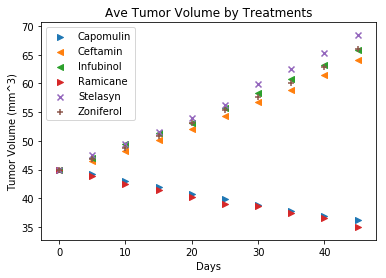

In [293]:
#Scatter plot 
Cap_tumor_plot = plt.scatter(timepoints, Cap_tumor_vol_avg, marker = ">", label = "Capomulin", alpha = 1)
Cap_tumor_plot = plt.scatter(timepoints, Cef_tumor_vol_avg, marker = "<", label = "Ceftamin", alpha = 1)
Ifo_tumor_plot = plt.scatter(timepoints, Inf_tumor_vol_avg, marker = "<", label = "Infubinol", alpha = 1)
Ram_tumor_plot = plt.scatter(timepoints, Ram_tumor_vol_avg, marker = ">", label = "Ramicane", alpha = 1)
Ste_tumor_plot = plt.scatter(timepoints, Ste_tumor_vol_avg, marker = "x", label = "Stelasyn", alpha = 1)
Zon_tumor_plot = plt.scatter(timepoints, Zon_tumor_vol_avg, marker = "+", label = "Zoniferol", alpha = 1)
plt.title("Ave Tumor Volume by Treatments")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")

plt.show()

### Observations:
* There is a linear postive relationship between Ceftamin and icreasing tumor volume overtime, Infubinol and icreasing tumor volume overtime,Stelasyn and icreasing tumor volume overtime, and Zoniferol and icreasing tumor volume overtime 
* There is a negative relationship between Ramicane and days, and Capomulin and days 

In [294]:
#Creating a scatter plot that shows the number
#of metastatic (cancer spreading) sites changes over time for each treatment.

In [295]:
Mast_Avarage = Drug_Time_Treat["Metastatic Sites"]
Mast_Avarage.head()

Drug       Timepoint
Capomulin  0            0.00
           5            0.16
           10           0.32
           15           0.38
           20           0.65
Name: Metastatic Sites, dtype: float64

In [296]:
Cap_Mast_avg = Mast_Avarage.loc["Capomulin", :]
Cef_Mast_ave = Mast_Avarage.loc["Ceftamin", :]
Inf_Mast_avg = Mast_Avarage.loc["Infubinol", :]
Ram_Mast_avg = Mast_Avarage.loc["Ramicane", :]
Ste_Mast_avg = Mast_Avarage.loc["Stelasyn", :]
Zon_Mast_avg = Mast_Avarage.loc["Zoniferol", :]

In [262]:
Cap_Mast_avg

Drug       Timepoint
Capomulin  0            0.00
           5            0.16
           10           0.32
           15           0.38
           20           0.65
           25           0.82
           30           1.09
           35           1.18
           40           1.38
           45           1.48
Name: Metastatic Sites, dtype: float64

In [263]:
Inf_Mast_avg

Drug       Timepoint
Infubinol  0            0.00
           5            0.28
           10           0.67
           15           0.90
           20           1.05
           25           1.28
           30           1.59
           35           1.67
           40           2.10
           45           2.11
Name: Metastatic Sites, dtype: float64

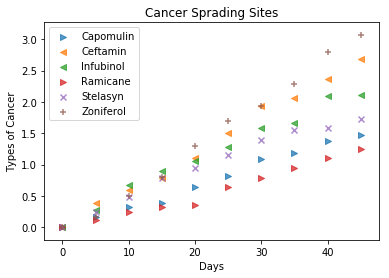

In [264]:
Cap_Mast_plot = plt.scatter(timepoints, Cap_Mast_avg, marker = ">", label = "Capomulin", alpha = .75)
Cef_Mast_plot = plt.scatter(timepoints, Cef_Mast_ave, marker = "<", label = "Ceftamin", alpha = .75)
Inf_Mast_plot = plt.scatter(timepoints, Inf_Mast_avg, marker = "<", label = "Infubinol", alpha = .75)
Ram_Mast_plot = plt.scatter(timepoints, Ram_Mast_avg, marker = ">", label = "Ramicane", alpha = .75)
Ste_Mast_plot = plt.scatter(timepoints, Ste_Mast_avg, marker = "x", label = "Stelasyn", alpha = .75)
Zon_Mast_plot = plt.scatter(timepoints, Zon_Mast_avg, marker = "+", label = "Zoniferol", alpha = .75)
plt.title("Cancer Sprading Sites")
plt.xlabel("Days")
plt.ylabel("Types of Cancer")
plt.legend(loc="best")

plt.show()

### Observations 
* There is a postive relatonship between each drugs and the spread of cancer overtime. 

#### Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [265]:
#Group by dataframe to get survival count
Survival_Count = Merged_Data.groupby(["Drug", "Timepoint"])["Timepoint"].count()
Survival_Count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Timepoint, dtype: int64

In [266]:
#Converting survival count to datafrmae 
Survival_Count= pd.DataFrame(Survival_Count).rename(columns = {"Timepoint" : "Mouse Count"})

In [267]:
#Getting mouse counts
Mouse_count = Merged_Data["Mouse ID"].count()
Mouse_count

1906

In [268]:
#Getting survial count per types of treatments
Survival_Count.head(20)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13

In [269]:
#Getting survival count per each drug types 
Cap_Mouse_Count = Survival_Count.loc["Capomulin", :]
Cef_Mouse_Count = Survival_Count.loc["Ceftamin", :]
Inf_Mouse_Count = Survival_Count.loc["Infubinol", :]
Ram_Mouse_Count = Survival_Count.loc["Ramicane", :]
Ste_Mouse_Count = Survival_Count.loc["Stelasyn", :]
Zon_Mouse_Count = Survival_Count.loc["Zoniferol", :]

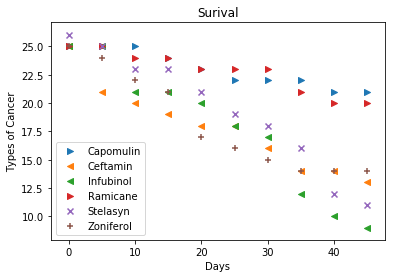

In [270]:
#Creating the scatter plots 
Cap_Mouse_Count = plt.scatter(timepoints, Cap_Mouse_Count, marker = ">", label = "Capomulin", alpha = 1)
Cef_Mouse_Count = plt.scatter(timepoints, Cef_Mouse_Count, marker = "<", label = "Ceftamin", alpha = 1)
Inf_Mouse_Count = plt.scatter(timepoints, Inf_Mouse_Count, marker = "<", label = "Infubinol", alpha = 1)
Ram_Mouse_Count = plt.scatter(timepoints, Ram_Mouse_Count, marker = ">", label = "Ramicane", alpha = 1)
Ste_Mouse_Count = plt.scatter(timepoints, Ste_Mouse_Count, marker = "x", label = "Stelasyn", alpha = 1)
Zon_Mouse_Count = plt.scatter(timepoints, Zon_Mouse_Count, marker = "+", label = "Zoniferol", alpha = 1)
plt.title("Surival")
plt.xlabel("Days")
plt.ylabel("Types of Cancer")
plt.legend(loc="best")

plt.show()

### Observations
* Survival rate declcides with each types of drugs (treatments) overtime

#Creating a bar graph that compares the total % 
#tumor volume change for each drug across the full 45 days.

In [272]:
Zon_Mast_avg

Drug       Timepoint
Zoniferol  0            0.00
           5            0.17
           10           0.50
           15           0.81
           20           1.29
           25           1.69
           30           1.93
           35           2.29
           40           2.79
           45           3.07
Name: Metastatic Sites, dtype: float64

In [286]:
#Percent chtumor_voange
Cap_tumor_vol_avg_percent_change = ((Cap_tumor_vol_avg[9] - Cap_tumor_vol_avg[1]/Cap_tumor_vol_avg[1])*100).round(0)
Cef_tumor_vol_avg_percent_change = ((Cef_tumor_vol_avg[9] - Cef_tumor_vol_avg[1]/Cef_tumor_vol_avg[1])*100).round(0)
Inf_tumor_vol_avg_percent_change = ((Inf_tumor_vol_avg[9] - Inf_tumor_vol_avg[1]/Inf_tumor_vol_avg[1])*100).round(0)
Ram_tumor_vol_avg_percent_change = ((Ram_tumor_vol_avg[9] - Ram_tumor_vol_avg[1]/Ram_tumor_vol_avg [1])*100).round(0)
Ste_tumor_vol_avg_percent_change = ((Ste_tumor_vol_avg[9] - Ste_tumor_vol_avg[1]/Ste_tumor_vol_avg [1])*100).round(0)
Zon_tumor_vol_avg_percent_change = ((Zon_tumor_vol_avg[9] - Zon_tumor_vol_avg[1]/Zon_tumor_vol_avg [1])*100).round(0)

In [287]:
Tumor_avg_percent_change_List = [Cap_tumor_vol_avg_percent_change,
                                   Cef_tumor_vol_avg_percent_change,
                                   Inf_tumor_vol_avg_percent_change,
                                   Ram_tumor_vol_avg_percent_change,
                                   Ste_tumor_vol_avg_percent_change,
                                   Zon_tumor_vol_avg_percent_change]


In [288]:
Tumor_avg_percent_change_List

[3524.0, 6313.0, 6476.0, 3396.0, 6744.0, 6496.0]

In [289]:
Drug_list

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Placebo', 'Zoniferol']

In [291]:
Tum_Per_Data = pd.DataFrame({"Drug" : Drug_list, "Tumor_Per_Change": Tumor_avg_percent_change_List}).round(0)
Tum_Per_Data.head()

,Drug,Tumor_Per_Change
0,Capomulin,3524.0
1,Ceftamin,6313.0
2,Infubinol,6476.0
3,Ramicane,3396.0
4,Placebo,6744.0


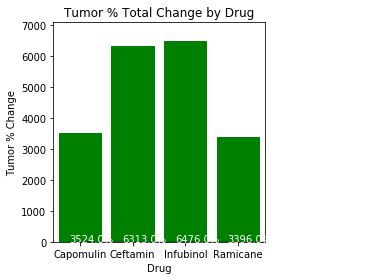

In [292]:
#plot tumor % table as bar chart
tumorBarChart = plt.bar(Tum_Per_Data["Drug"], Tum_Per_Data["Tumor_Per_Change"])

#format color and position of text based on positive or negative change
for i in range(len(Drug_list)):
    if Tumor_avg_percent_change_List[i] < 0:
        tumorBarChart[i].set_color("yellow")
        percText = format(tumorPercList[i] / 100, ".1%")
        plt.text(-.2 + i, -5, percText)
    else:
        tumorBarChart[i].set_color("green")
        percText = format(Tumor_avg_percent_change_List[i] / 100, ".1%")
        plt.text(-.2 + i, 2, percText, color = "w")
        
#formatting and titles
plt.hlines(0, -.2, 4.5, alpha=0.25)
plt.xlim(-.5, 3.5)
plt.title("Tumor % Total Change by Drug")
plt.xlabel("Drug")
plt.ylabel("Tumor % Change")
plt.tight_layout()
plt.show()


### Observations:

* Two of the drugs (Ceftamin and Infubinol) show higher tumor change compared to Capomulin and Ramicane. 